# Assignment 3

### Due: Sunday, February 23
 
For this assignment you will experiment with various regression approaches and you'll get your feet wet with some clustering. We will rely on subsets of some real-world data sets and on tools from the Scikit-learn machine learning package for Python as well as modules from the textbook code (Machine Learning in Action, Chapters 8 and 10).

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import pylab as pl 
import matplotlib.pyplot as plt
from statistics import mean

## 1.Linear Regression [Dataset: communities.zip]

For this problem you will experiment with multiple linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

#### a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. 

Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression. Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [2]:
#Read data
data = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 6/communities/communities.csv")
data.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


#### Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. 

In [3]:
data.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Auburncity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [4]:
data.corr()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
state,1.000000,-0.079569,-0.049505,-0.046154,0.213990,-0.318602,-0.210841,0.100622,0.036950,0.051230,...,-0.119553,-0.356149,0.340611,0.151854,0.062087,0.127616,-0.040350,-0.137940,-0.021431,-0.211398
population,-0.079569,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,...,0.651797,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.367157
householdsize,-0.049505,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,...,-0.043011,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.034923
racepctblack,-0.046154,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,...,0.167133,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.631264
racePctWhite,0.213990,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,...,-0.238925,-0.372924,0.113798,0.165285,-0.019677,0.032415,-0.131389,-0.337458,-0.215636,-0.684770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PctSameState85,0.127616,-0.089638,-0.003277,-0.002894,0.032415,-0.198279,0.000202,-0.150555,-0.317647,-0.274540,...,-0.079417,-0.137901,0.761741,0.670972,0.742042,1.000000,-0.104403,-0.012166,-0.042424,-0.019459
LandArea,-0.040350,0.713652,-0.015078,0.149758,-0.131389,-0.001084,0.011634,0.025736,0.062476,0.031632,...,0.425952,-0.048845,-0.069273,-0.116901,-0.062989,-0.104403,1.000000,-0.170856,0.007699,0.196800
PopDens,-0.137940,0.231897,-0.004072,0.095053,-0.337458,0.389944,0.370103,-0.095749,0.119725,0.045979,...,0.238896,0.614772,-0.221341,0.020701,0.118082,-0.012166,-0.170856,1.000000,0.587804,0.281390
PctUsePubTrans,-0.021431,0.270356,-0.051506,0.147023,-0.215636,0.296921,0.078366,-0.173279,-0.023507,-0.040419,...,0.239042,0.401711,-0.175459,0.192367,0.081260,-0.042424,0.007699,0.587804,1.000000,0.153829


In [5]:
data=data.replace("?", np.nan)
data=data.replace("{}", np.nan)

#### Drop missing value

In [6]:
print("There are 1 rows have missing value"+str(data[data.isnull().any(axis=1)].shape))
data=data.dropna()

There are 1 rows have missing value(1, 100)


#### Separate the target attribute for regression. 

In [7]:
#The target attribute for regression purposes is "ViolentCrimesPerPop". 
data_target=data['ViolentCrimesPerPop']
print(data_target.head())
#The two identifier attributes "state" and "community name" should be excluded for the regression task.
data_matrix=data.drop(["state","communityname",'ViolentCrimesPerPop'], axis=1)
data_matrix

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.00,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.01,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.06,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.04,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33


#### Create a 20%-80% randomized split of the data. Set aside the 20% test portion; the 80% training data partition will be used for cross-validation on various tasks specified below.

In [8]:
from sklearn.model_selection import train_test_split

train, test, target_train, target_test = train_test_split(data_matrix, data_target, 
                                                                      test_size=0.2, random_state=33)
print(test.shape)
test[0:5]

(399, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1159,0.58,0.40,0.86,0.00,0.91,0.26,0.36,0.48,0.31,0.37,...,0.25,0.69,0.59,0.43,0.49,0.68,0.69,0.16,0.56,1.00
1080,0.00,0.32,0.04,0.96,0.01,0.01,0.33,0.40,0.25,0.64,...,0.00,0.00,0.08,0.82,0.87,0.89,0.90,0.01,0.20,0.02
1634,0.02,0.49,0.01,0.98,0.05,0.02,0.38,0.37,0.24,0.46,...,0.00,0.00,0.10,0.79,0.80,0.83,0.91,0.09,0.05,0.12
1700,0.02,0.52,0.25,0.63,0.03,0.31,0.54,0.62,0.44,0.36,...,0.01,0.00,0.13,0.72,0.35,0.50,0.70,0.13,0.04,0.01
1956,0.03,0.37,0.40,0.68,0.03,0.01,0.39,0.47,0.34,0.55,...,0.01,0.01,0.03,0.78,0.59,0.71,0.69,0.06,0.10,0.00


#### b. Perform standard linear regression on data using the closed form solution implementation (not the scikit-learn implementation). Compute the RMSE value on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute.

Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [9]:
def standRegres(xArr,yArr):
    # You first load the x and y arrays and then convert them into matrices.
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    # Next you compute XTX and then test if its determinate is zero
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    # wˆ = (X T . X )**-1 *( X T . y)
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [10]:
# numpy matrix
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)
train_np=np.array(train)
train_np
x = np.array([np.concatenate((v,[1])) for v in train_np])
x = x.astype(np.float64)
y=np.array(target_train)
y = y.astype(np.float64)
#np.asmatrix(y).T
#m,c=find_gradient_and_intercept(x,y)
#target_train[0]
ws=standRegres(x,y)
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*ws


In [11]:
p = xMat*ws
#print(p.shape)
e =(p-(y.reshape(p.shape[0], 1)))
e=np.array((e)).reshape((p.shape[0], ))

# Let's see the error on the first 10 predictions
print(e[:10])

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(e,e)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

[ 0.02  0.21 -0.21 -0.15 -0.04 -0.09 -0.18 -0.02 -0.   -0.55]
RMSE on Training Data:  0.12752697697956913


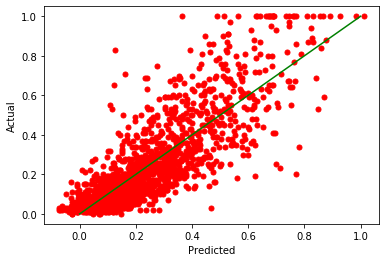

In [12]:
#print("Linear Regression Intercept: ", linreg.intercept_)
#print('Regression Coefficients: \n', linreg.coef_)
import pylab as pl 
%matplotlib inline
pl.plot(p, y,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [13]:
np.corrcoef(yHat.T, yMat)

array([[1.  , 0.83],
       [0.83, 1.  ]])

####  Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [14]:
def cross_validate( X, y, n, verbose=False):
    #model: regression model to be trained
    #X: the data matrix
    #y: the target variable array
    #n: the number of fold for x-validation
    #Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        ws=standRegres(X[train],y[train])
        p = (x[test]*ws)
        #print(p.shape[0])
        #print(y[test].reshape((160, 1))
        e =(p-(y[test].reshape(p.shape[0], 1)))
        e=np.array((e)).reshape((p.shape[0], ))
        rmse = np.sqrt(np.dot(e,e)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n
rmse_10cv = cross_validate(x, y, 10, verbose=True)
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Fold  1 RMSE: 0.1405
Fold  2 RMSE: 0.1304
Fold  3 RMSE: 0.1315
Fold  4 RMSE: 0.1426
Fold  5 RMSE: 0.1349
Fold  6 RMSE: 0.1377
Fold  7 RMSE: 0.1242
Fold  8 RMSE: 0.1260
Fold  9 RMSE: 0.1337
Fold 10 RMSE: 0.1581
Method: Simple Linear Regression
RMSE on training: 0.1275
RMSE on 10-fold CV: 0.1360


#### c. Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target variable; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. 

Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation using only the selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.

#### Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). 

In [15]:
#train, test, target_train, target_test
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=30)
train_fs = fs.fit_transform(train, target_train)

In [16]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(list(data_matrix.columns)) #all columns we have 
print(fs.get_support()) # the particular attrrible be seleted 
print(fs.scores_) #the score

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'Pers

In [17]:
print(data_matrix.columns[fs.get_support()].values)
#  the particular attrrible be seleted 

['racepctblack' 'racePctWhite' 'medIncome' 'pctWInvInc' 'pctWPubAsst' 'medFamInc' 'NumUnderPov' 'PctPopUnderPov'
 'PctLess9thGrade' 'PctNotHSGrad' 'PctUnemployed' 'MalePctDivorce' 'FemalePctDiv' 'TotalPctDiv' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'NumIlleg' 'PctIlleg' 'PctLargHouseFam' 'PctPersOwnOccup'
 'PctPersDenseHous' 'PctHousLess3BR' 'HousVacant' 'PctHousOwnOcc' 'PctVacantBoarded' 'PctHousNoPhone' 'NumInShelters']


In [18]:
train_fs #portions of data

array([[0.31, 0.69, 0.4, 0.39, 0.15, 0.37, 0.03, ..., 0.33, 0.51, 0.04, 0.75, 0.14, 0.09, 0.0],
       [0.41, 0.65, 0.14, 0.35, 0.42, 0.16, 0.02, ..., 0.18, 0.6, 0.03, 0.44, 0.35, 0.45, 0.0],
       [0.02, 0.97, 0.26, 0.68, 0.21, 0.28, 0.01, ..., 0.01, 0.34, 0.01, 0.72, 0.13, 0.08, 0.01],
       [0.0, 1.0, 0.32, 0.69, 0.11, 0.35, 0.0, ..., 0.04, 0.41, 0.01, 0.64, 0.03, 0.12, 0.0],
       [0.04, 0.69, 0.46, 0.43, 0.29, 0.44, 0.01, ..., 0.37, 0.32, 0.13, 0.67, 0.02, 0.08, 0.0],
       [0.03, 0.96, 0.47, 0.72, 0.12, 0.48, 0.01, ..., 0.03, 0.35, 0.02, 0.7, 0.1, 0.06, 0.0],
       [0.0, 0.7, 0.02, 0.12, 1.0, 0.01, 0.06, ..., 1.0, 0.65, 0.02, 0.59, 0.68, 1.0, 0.0],
       ...,
       [0.01, 0.95, 0.17, 0.41, 0.53, 0.2, 0.02, ..., 0.16, 0.6, 0.02, 0.47, 0.21, 0.4, 0.01],
       [0.05, 0.88, 0.66, 0.65, 0.15, 0.67, 0.01, ..., 0.1, 0.64, 0.03, 0.58, 0.02, 0.02, 0.0],
       [0.0, 0.98, 0.23, 0.49, 0.19, 0.25, 0.01, ..., 0.08, 0.47, 0.02, 0.63, 0.21, 0.55, 0.0],
       [0.16, 0.85, 0.37, 0.51, 0

#### Next, plot the model's mean absolute error values on cross-validation using only the selected features (See scikit-learn's metrics.mean_absolute_error). 
In order to use cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook (though note that the task in this example was classification not regression). Also, review scikit-learn documentation for feature selection.] 

In [19]:
def measure_performance(x,y,clf):
    from sklearn import metrics
    y_pred =clf.predict(x)
    MAE = metrics.mean_absolute_error(y,y_pred)
    return MAE

# Create linear regression object
linreg = LinearRegression()
# Train the model using the training set
linreg.fit(train_fs,target_train)

mae=measure_performance(train_fs,target_train,linreg)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.09532345301323748


Linear Regression Intercept:  0.1755312917963362
Regression Coefficients: 
 [ 0.2   0.03 -0.   -0.1   0.12  0.14  0.04 -0.08 -0.11  0.04 -0.02  0.38  0.21 -0.52 -0.01 -0.27 -0.03 -0.01 -0.27
  0.19 -0.07 -0.29  0.26  0.11  0.22  0.35  0.07 -0.01  0.17]


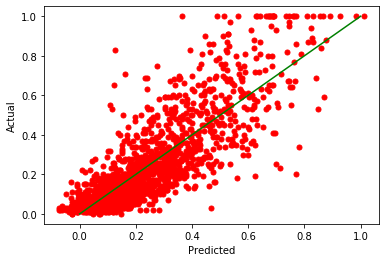

In [20]:
print("Linear Regression Intercept: ", linreg.intercept_)
print('Regression Coefficients: \n', linreg.coef_)
import pylab as pl 
%matplotlib inline
pl.plot(p, y,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

####  use cross_val_score with regression and pass to it scoring='mean_absolute_error' as a parameter 

In [21]:
#train data matrix, add w0 = 1 into end dataframe
x = np.array([np.concatenate((v,[1])) for v in train_np])
x
y=np.array(target_train)
y

array([0.31, 0.05, 0.22, 0.1 , 0.31, 0.19, 0.52, ..., 0.22, 0.11, 0.41, 0.14, 0.6 , 0.22, 0.06])

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()

percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    train_fs = fs.fit_transform(x, y)
    scores = cross_val_score(linreg, train_fs, y, cv=5, scoring='neg_mean_absolute_error')
    print("%2d  %0.4f" % (i, abs(scores.mean())))
    results = np.append(results, abs(scores.mean()))

/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

 1  0.1131
 6  0.1016
11  0.1014
16  0.1015
21  0.0995
26  0.0976
31  0.0977
36  0.0973
41  0.0969


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

46  0.0977
51  0.0979
56  0.0985
61  0.0987


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

66  0.0990
71  0.0990


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

76  0.0987
81  0.0987


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

86  0.0981
91  0.0976


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in

96  0.0974


Optimal percentile of features:41 

Optimal number of features:39 



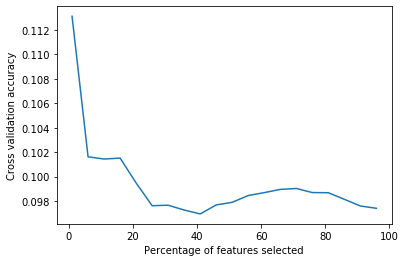

In [23]:
optimal_percentile_ind = np.where(results == results.min())[0][0]
print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile_ind]), "\n")
optimal_num_features = int(percentiles[optimal_percentile_ind]*len(data_matrix.columns)/100)
print("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

#### As a final step, train your model on the full 80% training data and evaluate it using the set-aside 20% test partition.

In [24]:
# fit the model
fs = feature_selection.SelectKBest(feature_selection.f_regression, optimal_num_features)
train_fs = fs.fit_transform(x, y)
linreg = LinearRegression()
linreg.fit(train_fs, y)

test_np=np.array(test)
x_test_np = np.array([np.concatenate((v,[1])) for v in test_np])
x_test_np
y_target_test_np=np.array(target_test)
y_target_test_np

test_fs = fs.transform(x_test_np)
test_fs
# First, let's compute errors on all training instances

# p is the array of predicted values
p_fm = linreg.predict(test_fs) 
# Now we can constuct an array of errors
err = abs(p_fm-y_target_test_np)

# Let's see the error on the first 10 predictions
print(err[:10])

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p_fm))
print("RMSE on Training Data: ", rmse_train)

[0.13 0.09 0.04 0.18 0.08 0.2  0.16 0.06 0.04 0.04]
RMSE on Training Data:  0.13943659743004325


/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Linear Regression Intercept:  0.31050408297819465
Regression Coefficients: 
 [-1.13  0.17  0.    0.98  0.13 -0.2  -0.22  0.08 -0.06  0.02  0.18 -0.1  -0.12  0.06  0.11 -0.    0.09  0.5   0.23
 -0.66  0.08 -0.28 -0.05  0.01 -0.25  0.21 -0.08 -0.2   0.27  0.05  0.01  0.2   0.2   0.07  0.   -0.01  0.03  0.11
  0.14]


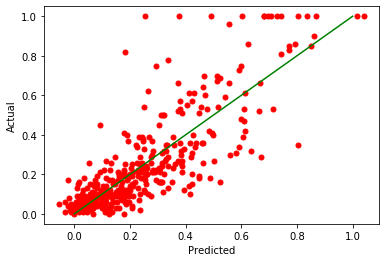

In [25]:
print("Linear Regression Intercept: ", linreg.intercept_)
print('Regression Coefficients: \n', linreg.coef_)
import pylab as pl 
%matplotlib inline
pl.plot(p_fm, y_target_test_np,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

#### d. Next, perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. You should create a function that takes as input the data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. 

The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha values, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

### Ridge Regression

In [26]:
def cross_validate(model, X, y, n, verbose=False):
    #model: regression model to be trained
    #X: the data matrix
    #y: the target variable array
    #n: the number of fold for x-validation
    #Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22)
    xval_err = 0
    f = 1
    for train,test in kf.split(x):
        model.fit(X[train],y[train])
        p = model.predict(x[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(x[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [27]:
#train data matrix, add w0 = 1 into end dataframe
x = np.array([np.concatenate((v,[1])) for v in train_np])
x
y=np.array(target_train)
y


print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,10,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    rmse_10cv = cross_validate(ridge, x, y, 10)
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1275		 0.1358
0.214	 0.1279		 0.1352
0.418	 0.1282		 0.1351
0.622	 0.1284		 0.1351
0.826	 0.1286		 0.1351
1.029	 0.1288		 0.1351
1.233	 0.1290		 0.1351
1.437	 0.1292		 0.1352
1.641	 0.1293		 0.1352
1.845	 0.1295		 0.1352
2.049	 0.1296		 0.1353
2.253	 0.1297		 0.1353
2.457	 0.1299		 0.1353
2.660	 0.1300		 0.1354
2.864	 0.1301		 0.1354
3.068	 0.1302		 0.1354
3.272	 0.1303		 0.1355
3.476	 0.1304		 0.1355
3.680	 0.1305		 0.1355
3.884	 0.1306		 0.1356
4.088	 0.1307		 0.1356
4.291	 0.1307		 0.1356
4.495	 0.1308		 0.1357
4.699	 0.1309		 0.1357
4.903	 0.1310		 0.1357
5.107	 0.1310		 0.1358
5.311	 0.1311		 0.1358
5.515	 0.1312		 0.1358
5.719	 0.1312		 0.1358
5.922	 0.1313		 0.1359
6.126	 0.1314		 0.1359
6.330	 0.1314		 0.1359
6.534	 0.1315		 0.1359
6.738	 0.1315		 0.1359
6.942	 0.1316		 0.1360
7.146	 0.1316		 0.1360
7.350	 0.1317		 0.1360
7.553	 0.1317		 0.1360
7.757	 0.1318		 0.1361
7.961	 0.1318		 0.1361
8.165	 0.1319		 0.1361
8.369	 0.1

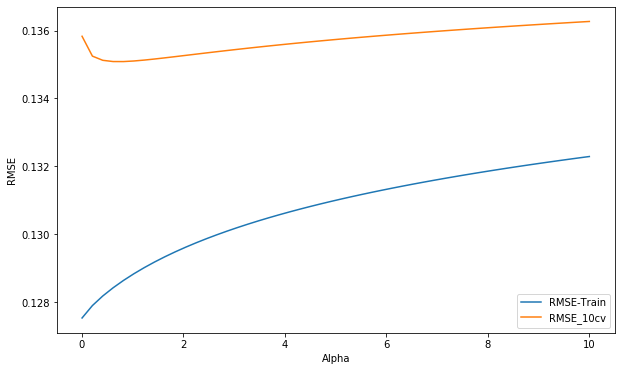

we will pick this value for Ridge: 
 alpha:1.233	 RMSE_train:0.1290		 RMSE_10cv:0.1351


In [28]:
fig = pl.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_10cv')
pl.legend( ('RMSE-Train', 'RMSE_10cv') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()
print('we will pick this value for Ridge: \n alpha:{:.3f}\t RMSE_train:{:.4f}\t\t RMSE_10cv:{:.4f}'.format(1.233,0.1290,0.1351))

In [29]:
test_np=np.array(test)
x_test_np = np.array([np.concatenate((v,[1])) for v in test_np])
x_test_np
y_target_test_np=np.array(target_test)
y_target_test_np

ridge = Ridge(alpha=1.233)
    
    # computing the RMSE on training data
ridge.fit(x,y)
p = ridge.predict(x_test_np)
err = p-y_target_test_np
print(err[:10])
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

[-0.17  0.1   0.02 -0.23  0.05  0.23  0.14 -0.    0.05 -0.05]
RMSE on Training Data:  0.13632124193927456


### Lasso Regression

In [30]:
print('Lasso Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,1,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(alpha=a)
    
    # computing the RMSE on training data
    lasso.fit(x,y)
    p = lasso.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    rmse_10cv = cross_validate(lasso, x, y, 10)
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Lasso Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1534		 0.1536
0.030	 0.2043		 0.2045
0.050	 0.2297		 0.2294
0.071	 0.2297		 0.2294
0.091	 0.2297		 0.2294
0.111	 0.2297		 0.2294
0.131	 0.2297		 0.2294
0.151	 0.2297		 0.2294
0.172	 0.2297		 0.2294
0.192	 0.2297		 0.2294
0.212	 0.2297		 0.2294
0.232	 0.2297		 0.2294
0.252	 0.2297		 0.2294
0.273	 0.2297		 0.2294
0.293	 0.2297		 0.2294
0.313	 0.2297		 0.2294
0.333	 0.2297		 0.2294
0.353	 0.2297		 0.2294
0.374	 0.2297		 0.2294
0.394	 0.2297		 0.2294
0.414	 0.2297		 0.2294
0.434	 0.2297		 0.2294
0.454	 0.2297		 0.2294
0.475	 0.2297		 0.2294
0.495	 0.2297		 0.2294
0.515	 0.2297		 0.2294
0.535	 0.2297		 0.2294
0.556	 0.2297		 0.2294
0.576	 0.2297		 0.2294
0.596	 0.2297		 0.2294
0.616	 0.2297		 0.2294
0.636	 0.2297		 0.2294
0.657	 0.2297		 0.2294
0.677	 0.2297		 0.2294
0.697	 0.2297		 0.2294
0.717	 0.2297		 0.2294
0.737	 0.2297		 0.2294
0.758	 0.2297		 0.2294
0.778	 0.2297		 0.2294
0.798	 0.2297		 0.2294
0.818	 0.2297		 0.2294
0.838	 0.2

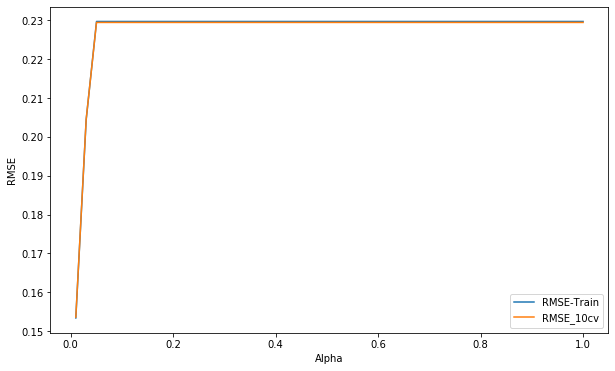

we will pick this value for Ridge: 
 alpha:0.010	 RMSE_train:0.1534		 RMSE_10cv:0.1536


In [31]:
fig = pl.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(alpha, t_rmse, label='RMSE-Train')
ax.plot(alpha, cv_rmse, label='RMSE_10cv')
pl.legend( ('RMSE-Train', 'RMSE_10cv') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()
print('we will pick this value for Ridge: \n alpha:{:.3f}\t RMSE_train:{:.4f}\t\t RMSE_10cv:{:.4f}'.format(0.010,0.1534,0.1536))

In [32]:
test_np=np.array(test)
x_test_np = np.array([np.concatenate((v,[1])) for v in test_np])
x_test_np
y_target_test_np=np.array(target_test)
y_target_test_np

lasso = Lasso(alpha=0.010)
    
    # computing the RMSE on training data
lasso.fit(x,y)
p = lasso.predict(x_test_np)
err = p-y_target_test_np
print(err[:10])
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

[-0.41  0.12  0.08 -0.18  0.03  0.21  0.09  0.07  0.08  0.06]
RMSE on Training Data:  0.16069758952791355


#### e. Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. 

For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). 

Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a brief summary of your findings from the above experiments.

In [33]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.
#from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
sgdreg = SGDRegressor()
param_grid = {'penalty': ['l1', 'l2'],
              'alpha': np.linspace(.0001,10,100)}

#param_grid = {'average': [True, False],
#              'l1_ratio': np.linspace(0, 1, num=10),
#              'alpha': np.power(10, np.arange(-4, 1, dtype=float))}

grid_search = GridSearchCV(sgdreg, param_grid=param_grid)

grid_search.fit(x, y)
#grid_search.cv_results_['params']

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(grid_search.cv_results_)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model with rank: 1
Mean validation score: 0.625 (std: 0.007)
Parameters: {'alpha': 0.0001, 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.623 (std: 0.005)
Parameters: {'alpha': 0.0001, 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.601 (std: 0.005)
Parameters: {'alpha': 0.10110909090909091, 'penalty': 'l2'}



In [34]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x) # scale version of x

sgdreg = SGDRegressor(penalty='l1', alpha=0.0001, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
from sklearn.model_selection import KFold

n = 10
kf = KFold(n_splits=n, random_state=22)
xval_err = 0
f = 1
for kftrain,kftest in kf.split(x):
    scaler = StandardScaler()
    scaler.fit(x[kftrain])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[kftrain])
    xtest_s = scaler.transform(x[kftest])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[kftrain])
    p = sgdreg.predict(xtest_s)
    e = p-y[kftest]
    
    rmse = np.sqrt(np.dot(e,e)/len(x[kftest]))
    print("Fold %2d RMSE: %.4f" % (f, rmse))
    xval_err += rmse
    f += 1

rmse_10cv = xval_err/n

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Fold  1 RMSE: 0.1467
Fold  2 RMSE: 0.1357
Fold  3 RMSE: 0.1355
Fold  4 RMSE: 0.1433
Fold  5 RMSE: 0.1366
Fold  6 RMSE: 0.1452
Fold  7 RMSE: 0.1270
Fold  8 RMSE: 0.1297
Fold  9 RMSE: 0.1515
Fold 10 RMSE: 0.1595
Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1332
RMSE on 10-fold CV: 0.1411


In [35]:
print('ElasticNet Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,1,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    elasticNet = ElasticNet(alpha=a)
    
    # computing the RMSE on training data
    elasticNet.fit(x,y)
    p = elasticNet.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    rmse_10cv = cross_validate(elasticNet, x, y, 10)
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

ElasticNet Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1441		 0.1451
0.030	 0.1675		 0.1676
0.050	 0.1960		 0.1961
0.071	 0.2231		 0.2231
0.091	 0.2297		 0.2294
0.111	 0.2297		 0.2294
0.131	 0.2297		 0.2294
0.151	 0.2297		 0.2294
0.172	 0.2297		 0.2294
0.192	 0.2297		 0.2294
0.212	 0.2297		 0.2294
0.232	 0.2297		 0.2294
0.252	 0.2297		 0.2294
0.273	 0.2297		 0.2294
0.293	 0.2297		 0.2294
0.313	 0.2297		 0.2294
0.333	 0.2297		 0.2294
0.353	 0.2297		 0.2294
0.374	 0.2297		 0.2294
0.394	 0.2297		 0.2294
0.414	 0.2297		 0.2294
0.434	 0.2297		 0.2294
0.454	 0.2297		 0.2294
0.475	 0.2297		 0.2294
0.495	 0.2297		 0.2294
0.515	 0.2297		 0.2294
0.535	 0.2297		 0.2294
0.556	 0.2297		 0.2294
0.576	 0.2297		 0.2294
0.596	 0.2297		 0.2294
0.616	 0.2297		 0.2294
0.636	 0.2297		 0.2294
0.657	 0.2297		 0.2294
0.677	 0.2297		 0.2294
0.697	 0.2297		 0.2294
0.717	 0.2297		 0.2294
0.737	 0.2297		 0.2294
0.758	 0.2297		 0.2294
0.778	 0.2297		 0.2294
0.798	 0.2297		 0.2294
0.818	 0.2297		 0.2294
0.838

In [36]:
test_np=np.array(test)
test_np
x_test_np = np.array([np.concatenate((v,[1])) for v in test_np])
x_test_np
y_target_test_np=np.array(target_test)
y_target_test_np

elasticNet = ElasticNet(alpha=0.010)
    
# computing the RMSE on training data
elasticNet.fit(x,y)
p = elasticNet.predict(x_test_np)
err = p-y_target_test_np
print(err[:10])
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)

[-0.33  0.11  0.05 -0.19  0.04  0.23  0.12  0.06  0.08  0.03]
RMSE on Training Data:  0.1514955534441518


#### Conclusion: all of them have really small RMSE, around 0.13 to 0.15, so the performence is not bad

## 2.Automatic Document Clustering [Dataset: newsgroups5.zip]
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

In [37]:
import numpy as np
import pandas as pd
import pylab as pl 
import matplotlib.pyplot as plt

In [38]:
#Read data
classes = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 6/newsgroups5/classes.txt"
                     ,delimiter=' ').iloc[0:,1:2]
classes= classes.rename(columns={"Five": "Class"})
classes

,Class
0,0
1,1
2,1
3,1
4,2
...,...
2495,4
2496,4
2497,3
2498,4


In [39]:
#Read data
matrix = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 6/newsgroups5/matrix.txt"
                      ,header=None, delimiter=',')
matrix.head()
matrix

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:

#Read data
terms = pd.read_csv("/Users/laytonwoohbill/Desktop/Depaul/2020 - winter/DSC 478 ML/week 6/newsgroups5/terms.txt"
                      ,header=None, delimiter=',')
terms= terms.rename(columns={0: "Term"})
terms.head()
terms.shape

(9328, 1)

#### a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [41]:
def distCosine(vecA, vecB):
    # first find the vector norm for each instance in D as wel as the norm for vector x
    D_norm = np.linalg.norm(vecB)
    x_norm = np.linalg.norm(vecA)
    # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
    sims = np.dot(vecA,vecB)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dists = 1 - sims
    #print(dists)
    return dists

In [42]:
x=np.array([1,3,4,5])
x
y=np.array([2,3,4,5])
distCosine(x,y)

0.009119285843282365

#### b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). 

Use the 80% segment for clustering in the next part. The 20% portion must be a random subset. 

In [43]:
DTmatrix = matrix.T
DTmatrix

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split

#split the transformed data into training and test sets (using 80%-20% randomized split)
NG_train, NG_test, NG_target_train, NG_target_test = train_test_split(DTmatrix,classes, 
                                                                      test_size=0.2, random_state=33)
print(NG_train.shape)
NG_train[0:5]


(2000, 9328)


,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#NG_train=NG_train.T
numTerms=NG_train.shape[0]
print(numTerms)
NDocs = NG_train.shape[1]
print(NDocs)

2000
9328


In [46]:
DFtrain = pd.DataFrame([((NG_train)!=0).sum(1)]).T
DFtrain

,0
1289,28
596,22
1935,36
2436,31
2349,31
...,...
2243,62
57,32
578,332
1752,50


In [47]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(NG_train), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix.shape)

(2000, 9328)


In [48]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.
IDF = np.log2(np.divide(NMatrix, np.array(DFtrain)))
np.set_printoptions(precision=2,suppress=True)
print(IDF)

[[8.38 8.38 8.38 8.38 8.38 8.38 8.38 ... 8.38 8.38 8.38 8.38 8.38 8.38 8.38]
 [8.73 8.73 8.73 8.73 8.73 8.73 8.73 ... 8.73 8.73 8.73 8.73 8.73 8.73 8.73]
 [8.02 8.02 8.02 8.02 8.02 8.02 8.02 ... 8.02 8.02 8.02 8.02 8.02 8.02 8.02]
 [8.23 8.23 8.23 8.23 8.23 8.23 8.23 ... 8.23 8.23 8.23 8.23 8.23 8.23 8.23]
 [8.23 8.23 8.23 8.23 8.23 8.23 8.23 ... 8.23 8.23 8.23 8.23 8.23 8.23 8.23]
 [5.88 5.88 5.88 5.88 5.88 5.88 5.88 ... 5.88 5.88 5.88 5.88 5.88 5.88 5.88]
 [7.06 7.06 7.06 7.06 7.06 7.06 7.06 ... 7.06 7.06 7.06 7.06 7.06 7.06 7.06]
 ...
 [8.14 8.14 8.14 8.14 8.14 8.14 8.14 ... 8.14 8.14 8.14 8.14 8.14 8.14 8.14]
 [6.94 6.94 6.94 6.94 6.94 6.94 6.94 ... 6.94 6.94 6.94 6.94 6.94 6.94 6.94]
 [7.23 7.23 7.23 7.23 7.23 7.23 7.23 ... 7.23 7.23 7.23 7.23 7.23 7.23 7.23]
 [8.19 8.19 8.19 8.19 8.19 8.19 8.19 ... 8.19 8.19 8.19 8.19 8.19 8.19 8.19]
 [4.81 4.81 4.81 4.81 4.81 4.81 4.81 ... 4.81 4.81 4.81 4.81 4.81 4.81 4.81]
 [7.54 7.54 7.54 7.54 7.54 7.54 7.54 ... 7.54 7.54 7.54 7.54 7.54 7.54 

In [49]:
TD_tfidf = NG_train* IDF
pd.set_option("display.precision", 2)
TD_tfidf

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
1289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### c. Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. 

Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool or library, ideally with a Python based API, to create a word cloud for each cluster.]

In [50]:
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    #print(centroids)
    return centroids 

def kMeans(dataSet, k, distMeas=distCosine, createCent=randCent):
    m = shape(dataSet)[0]
    #print(m)
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                #print(centroids[j,:].shape)
                #print(dataSet[i,:].shape)
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                #print(distJI)
                if distJI < minDist:
                    minDist = distJI; minIndex = j 
                    #print(distJI,minIndex)
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment





In [51]:
DT_tfidf = TD_tfidf
DT_tfidf = np.array(DT_tfidf)
DT_tfidf.shape

(2000, 9328)

In [105]:
centroids_tfidf, clusters_tfidf = kMeans(DT_tfidf, 5, distCosine, randCent)

In [106]:
#DT = np.array(DT)
#centroids, clusters = kMeans(DT, 5, distCosine, randCent)

In [107]:
centroids = pd.DataFrame(centroids_tfidf,columns=terms)
centroids

,"(aa,)","(aargh,)","(aaron,)","(aaronc,)","(ab,)","(abandon,)","(abc,)","(abid,)","(abil,)","(abl,)",...,"(zq,)","(zr,)","(zrb,)","(zs,)","(zu,)","(zubov,)","(zv,)","(zw,)","(zx,)","(zz,)"
0,0.02,0.00,9.58e-01,0.13,0.03,0.07,0.00,1.75e-02,0.23,0.63,...,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00
1,0.02,0.00,8.31e-03,0.00,0.04,0.02,0.03,8.38e-03,0.27,0.86,...,0.01,5.50e-03,0.00,0.01,5.50e-03,0.00,5.50e-03,0.01,5.50e-03,0.00
2,0.04,0.00,9.59e-02,0.00,0.12,0.00,0.00,0.00e+00,0.02,0.14,...,0.08,6.15e-02,0.03,0.01,3.07e-02,0.00,3.21e-01,0.00,0.00e+00,0.06
3,0.00,0.06,1.57e-02,0.00,0.00,0.04,0.73,0.00e+00,0.13,0.50,...,0.00,0.00e+00,0.00,0.00,0.00e+00,0.15,0.00e+00,0.00,0.00e+00,0.00
4,0.00,0.00,0.00e+00,0.00,0.83,0.00,0.00,0.00e+00,0.00,0.00,...,0.00,8.27e-01,0.00,10.06,0.00e+00,0.00,0.00e+00,1.07,0.00e+00,0.00


In [108]:
clusters = pd.DataFrame(clusters_tfidf, columns=["Cluster", "MinDistance**2"])
print(np.array(clusters['Cluster']))
#NG_target_train.columns=range(1)
target=np.array((NG_target_train)).reshape((2000, ))
target
#print(np.array(NG_target_train.T))
pred=np.array(clusters['Cluster']).reshape((2000, ))
pred
#np.array(pred).shape

[2. 1. 2. 2. 1. 0. 1. ... 3. 0. 1. 1. 0. 1. 1.]


array([2., 1., 2., 2., 1., 0., 1., ..., 3., 0., 1., 1., 0., 1., 1.])

#### d. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [109]:
from sklearn.metrics import completeness_score, homogeneity_score

In [110]:
print(completeness_score(target,pred))

0.7638525622278797


In [111]:
print(homogeneity_score(target,pred))

0.643655810901398


In [112]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(data[clusters == c])
    return size


In [113]:
cluster_sizes(clusters['Cluster'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


{0.0: 379, 1.0: 765, 2.0: 456, 3.0: 387, 4.0: 6}

#### e. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. 
For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster. 

In [114]:
NG_test=np.array(NG_test)

In [115]:
NG_target_test=np.array(NG_target_test).reshape((500, ))

In [116]:
def testing(centroids,dataSet):
    m = shape(dataSet)[0]
    #print(m)
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    for i in range(m): #for each data point assign it to the closest centroid
        minDist = inf; minIndex = -1
        for j in range(5):
            #print(centroids[j,:])
            #print(dataSet[i,:])
            distJI = distCosine(centroids[j,:],dataSet[i,:])
            #print(distJI)
            if distJI < minDist:
                minDist = distJI; minIndex = j 
                #print(distJI,minIndex)
                if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
            
    clusters = pd.DataFrame(clusterAssment, columns=["Cluster", "MinDistance**2"])        
    return clusters

testing_cluster=testing(centroids_tfidf,NG_test)
testing_pred=np.array(testing_cluster['Cluster']).reshape((500, ))
testing_pred

array([0., 0., 2., 1., 2., 1., 3., 2., 0., 0., 0., 2., 1., 2., 2., 1., 1., 0., 0., 1., 0., 1., 2., 2., 1., 1., 3., 3.,
       2., 1., 2., 0., 1., 2., 1., 1., 1., 1., 3., 3., 0., 3., 1., 0., 1., 2., 3., 2., 0., 1., 1., 3., 1., 1., 0., 2.,
       1., 1., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 2., 1., 2., 3., 1., 1., 0., 1., 3., 2., 3., 3., 2., 2.,
       2., 3., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 3., 0., 1., 2., 3., 3., 2., 2., 0., 3., 3., 3., 3., 1., 2., 1.,
       2., 1., 2., 2., 3., 1., 1., 3., 2., 3., 1., 0., 3., 1., 2., 1., 1., 0., 2., 0., 0., 0., 0., 1., 0., 1., 1., 2.,
       3., 2., 2., 3., 3., 1., 0., 1., 2., 1., 2., 1., 2., 2., 1., 0., 3., 3., 3., 2., 0., 3., 1., 1., 1., 2., 0., 1.,
       2., 0., 1., 2., 3., 2., 3., 1., 2., 2., 1., 2., 0., 2., 1., 3., 2., 1., 0., 1., 2., 1., 2., 3., 3., 1., 3., 2.,
       2., 2., 0., 3., 0., 0., 2., 1., 0., 2., 2., 2., 0., 0., 0., 3., 2., 2., 3., 3., 0., 0., 0., 1., 2., 1., 1., 2.,
       3., 1., 1., 1., 2., 0., 0., 1., 2., 0., 3

In [117]:
from sklearn.metrics import classification_report
print(classification_report(NG_target_test, testing_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.54      1.00      0.70        94
           2       0.03      0.04      0.03       108
           3       0.98      0.90      0.94        98
           4       0.00      0.00      0.00       110

    accuracy                           0.37       500
   macro avg       0.31      0.39      0.33       500
weighted avg       0.30      0.37      0.32       500



In [118]:
from sklearn.metrics import confusion_matrix
kmeancm = confusion_matrix(NG_target_test, testing_pred)
print(kmeancm)

[[  0  74  15   0   1]
 [  0  94   0   0   0]
 [103   1   4   0   0]
 [  1   1   8  88   0]
 [  2   4 102   2   0]]


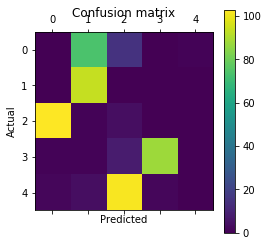

In [119]:
import pylab as plt
%matplotlib inline
plt.matshow(kmeancm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [120]:
print(completeness_score(NG_target_test,testing_pred))

0.788876796585579


In [121]:
print(homogeneity_score(NG_target_test,testing_pred))

0.6712168970222651


#### After several testing, finally we find a completeness_score and homogeneity_score have not bad performance in  both train and testing 

In [69]:
'''
# numpy matrix
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)
train_np=np.array(train)
train_np
# In order to do multiple regression we need to add a column of 1s as the coefficient for x0 
#train data matrix, add w0 = 1 into end dataframe
x = np.array([np.concatenate((v,[1])) for v in train_np])
x
y=np.array(target_train)
y
'''
'''
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

# Create linear regression object
linreg = LinearRegression()
# Train the model using the training set
linreg.fit(x,y)
'''
'''for i in range(10):
    pred = linreg.predict(np.array([x[i]]))[0]
    #print(pred)
    print("%2d \t %2.2f \t %2.2f" % (i, pred, y[i]))
'''
'''
# First, let's compute errors on all training instances

p = linreg.predict(x) # p is the array of predicted values
# Now we can constuct an array of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err[:10])

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Finally compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print("RMSE on Training Data: ", rmse_train)
'''
'''print("Linear Regression Intercept: ", linreg.intercept_)
print('Regression Coefficients: \n', linreg.coef_)
import pylab as pl 
%matplotlib inline
pl.plot(p, y,'ro', markersize=5)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()
'''
'''print('Regression Coefficients: \n', linreg.coef_)'''

'''fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,0].flatten().A[0], yMat.T[:,0].flatten().A[0])

xCopy=xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws
ax.plot(xCopy[:,0],yHat)
plt.show()'''

'fig = plt.figure()\nax = fig.add_subplot(111)\nax.scatter(xMat[:,0].flatten().A[0], yMat.T[:,0].flatten().A[0])\n\nxCopy=xMat.copy()\nxCopy.sort(0)\nyHat=xCopy*ws\nax.plot(xCopy[:,0],yHat)\nplt.show()'

In [70]:
'''def cluster_report(data,clusters,centroids):
    
    
    
    #clusterDict
    DFtrain = pd.DataFrame([((NG_train)!=0).sum(1)]).T
    DFtrain
    ofDoc=DFtrain/cluster_sizes
    , index=DT.index)
    
    
    
    #cluster_sizes
    cluster_sizes = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        cluster_sizes[c] = len(data[clusters == c])
    
    
    
    return clusterDict,cluster_sizes
    
''' 

'def cluster_report(data,clusters,centroids):\n    \n    \n    \n    #clusterDict\n    DFtrain = pd.DataFrame([((NG_train)!=0).sum(1)]).T\n    DFtrain\n    ofDoc=DFtrain/cluster_sizes\n    , index=DT.index)\n    \n    \n    \n    #cluster_sizes\n    cluster_sizes = {}\n    cluster_labels = np.unique(clusters)\n    n_clusters = cluster_labels.shape[0]\n\n    for c in cluster_labels:\n        cluster_sizes[c] = len(data[clusters == c])\n    \n    \n    \n    return clusterDict,cluster_sizes\n    \n'

In [71]:
'''
def display_cluster(clusterDict,clusterSize,numterms):
    for c in clusterDict.key():
        cluster_rep = clusterDict[c]
        print("\nClister",c,"size=",clusterSize[c])
        print("------------------------------------")
        print(cluster_rep.sort_values(by="DF",ascending=False).head(numterms))
display_cluster(display_cluster,10,10)
'''

'\ndef display_cluster(clusterDict,clusterSize,numterms):\n    for c in clusterDict.key():\n        cluster_rep = clusterDict[c]\n        print("\nClister",c,"size=",clusterSize[c])\n        print("------------------------------------")\n        print(cluster_rep.sort_values(by="DF",ascending=False).head(numterms))\ndisplay_cluster(display_cluster,10,10)\n'

In [72]:
'''DFtrain = pd.DataFrame([((NG_train)!=0).sum(1)]).T
DFtrain
'''

'DFtrain = pd.DataFrame([((NG_train)!=0).sum(1)]).T\nDFtrain\n'